In [134]:
from Bio import SeqIO
import numpy as np
import allel
import matplotlib.pyplot as plt

In [141]:
### Read in GFF
f = open('../covid19_population_genomics/interpatient/reference.gff')
genes = {}
for line in f.readlines():
    if not line.startswith("#"):
        if line.split("\t")[2] == 'CDS':
            gene = line.split(";product=")[1].split(";")[0]
            start = int(line.split("\t")[3])
            stop = int(line.split("\t")[4])
            genes[gene] = {"start": start, "stop": stop}

### Create alignment to GFF index
ref = 'MN908947'
seqs = []

for record in SeqIO.parse('../covid19_population_genomics/interpatient/mar20_filtered.aln', 'fasta'):
    if record.id == ref:
        ref_record = record
    seqs.append(str(record.seq).upper())

align_index = {}
true_pos = 1
align_pos = 1
for pos in ref_record:
    if pos != '-':
        align_index[align_pos] = true_pos
        true_pos += 1
    else:
        align_index[align_pos] = np.nan
    align_pos += 1

In [142]:
## Create scikit-alllel object

P2C = {'A':0, 'C':1, 'T':2, 'G':3}
C2P = {0:'A', 1:'C', 2:'T', 3:'G'}

allele_counts = []
align_pos = 1
for pos in ref_record:
    alleles = [0,0,0,0]
    if not np.isnan(align_index[align_pos]):
        for seq in seqs:
            if seq[align_pos-1] in P2C:
                alleles[P2C[seq[align_pos-1]]] += 1


        allele_counts.append(alleles)
    align_pos += 1
allel1 = allel.AlleleCountsArray(allele_counts)

In [143]:
## calculate pi at every position
positions = [x for x in range(1, len(allel1)+1)]
nuc_div = allel.windowed_diversity(positions, allel1, start=1, size=1, step=1)

In [ ]:
f = open('../covid19_population_genomics/interpatient/nucleotide_diversity.txt', 'w+')
i = 1
for pi in nuc_div[0]:
    f.write(str(i) + "\t" + str(pi) + "\n")
    i += 1
f.close()

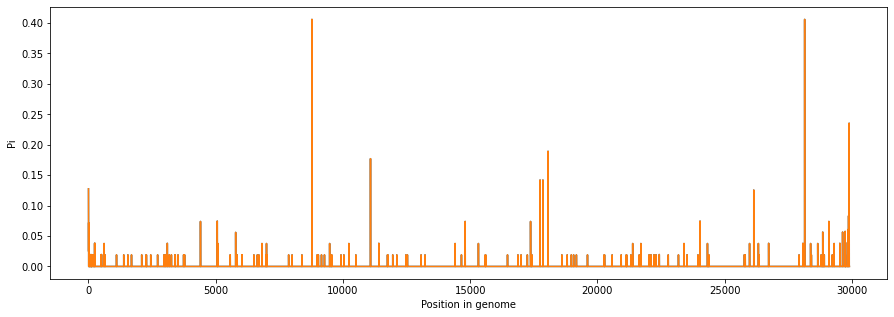

In [144]:
plt.figure(figsize=(15,5))
plt.plot(nuc_div[1], nuc_div[0])
# plt.savefig("out.png")
plt.ylabel("Pi")
plt.xlabel("Position in genome")
plt.show()

In [145]:
## calculate pi for each gene

gene_names = []
genes_pi = []
for g in genes:
    nuc_div = allel.sequence_diversity(range(genes[g]['start'], genes[g]['stop']+1), allel1)
    gene_names.append(g)
    genes_pi.append(nuc_div)

<ipython-input-149-be1504b7f8c8>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(gene_names, genes_pi)


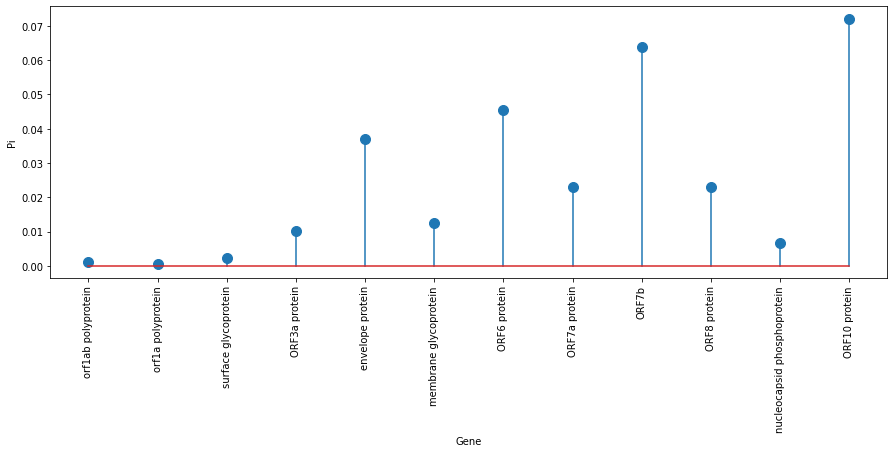

In [149]:
plt.figure(figsize=(15,5))
plt.scatter(gene_names, genes_pi, s=100)
# plt.savefig("out.png")

plt.stem(gene_names, genes_pi)
plt.ylabel("Pi")
plt.xlabel("Gene")
plt.xticks(rotation=90)
plt.show()

In [147]:
genes

{'orf1ab polyprotein': {'start': 13468, 'stop': 21555},
 'orf1a polyprotein': {'start': 266, 'stop': 13483},
 'surface glycoprotein': {'start': 21563, 'stop': 25384},
 'ORF3a protein': {'start': 25393, 'stop': 26220},
 'envelope protein': {'start': 26245, 'stop': 26472},
 'membrane glycoprotein': {'start': 26523, 'stop': 27191},
 'ORF6 protein': {'start': 27202, 'stop': 27387},
 'ORF7a protein': {'start': 27394, 'stop': 27759},
 'ORF7b': {'start': 27756, 'stop': 27887},
 'ORF8 protein': {'start': 27894, 'stop': 28259},
 'nucleocapsid phosphoprotein': {'start': 28274, 'stop': 29533},
 'ORF10 protein': {'start': 29558, 'stop': 29674}}